###Import required modules

In [ ]:
import tensorflow as tf
import keras
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adadelta,Adagrad
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization

In [ ]:
import numpy as np
from io import StringIO
import importlib.util
from numpy import matlib
import matplotlib.pyplot as plt
import random as random
import math
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings('ignore')
tf.config.run_functions_eagerly(True)

Loading and Pre-processing Data

4431872/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


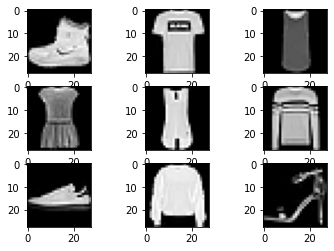

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

###Preparing test and train data

In [ ]:
def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

###Sample model

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
def evaluate_model1():
  model = define_model()

  history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=1)

  _, acc = model.evaluate(testX, testY, verbose=0)
  print('Accuracy: %.3f' % (acc * 100.0))
  return acc,history

In [ ]:
trainX, trainY, testX, testY = load_dataset()

trainX, testX = prep_pixels(trainX, testX)

In [ ]:
scores, histories = evaluate_model1() 

#PSO


In [ ]:
#history variable to store pso' performance
history_pso=[]
#List of Parameters to optimize
hyperparameters = [[5,6,7,8,9,10],
                 [16,32,64,128,256,512,1024],
                 ["tanh","softmax","sigmoid","softplus","softsign","linear"], 
                 ["sgd","rmsprop","adagrad","adadelta","adam","adamax","nadam"],
                 ["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error",
                  "mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge","logcosh",
                  "categorical_crossentropy","binary_crossentropy","kullback_leibler_divergence","poisson"]

In [ ]:
#Re-shaping test and train data
image_vector_size=28*28

trainX, trainY
trainX = trainX.reshape(trainX.shape[0], image_vector_size)
testX = testX.reshape(testX.shape[0], image_vector_size)

In [ ]:
# define ANN model for Particle swarm optimization
def define_model(hpara):
  model = Sequential()

  depth = hyperparameters[0]
  neurons_per_layer = hyperparameters[1]
  activations = hyperparameters[2]
  optimizer = hyperparameters[3]
  losses = hyperparameters[4]
  
  model = Sequential()
  
  network_depth = depth[hpara[0]]
  

  for i in range(network_depth):
      if i == 0:
          neurons = neurons_per_layer[hpara[1]]
          activation  = activations[hpara[9]]
          model.add(Dense(neurons,input_shape = (image_vector_size,), activation  = activation))
      if i == network_depth - 1:
          activation  = activations[hpara[17]]
          model.add(Dense(10, activation = activation ))
      else:
          neurons = neurons_per_layer[hpara[i]]
          activation  = activations[hpara[i+9]]
          model.add(Dense(neurons, activation  = activation))
  
  loss=losses[hpara[19]]
  optimizer=optimizer[hpara[18]]
  history_pso_para.append(hpara)
  model.compile(loss=loss, optimizer= optimizer, metrics=['accuracy'])
  return model

In [ ]:
#function to evaluate models with parameters passed by PSO
def evaluate_model(hpara):
  model = define_model(hpara)
  history = model.fit(trainX[0:2000], trainY[0:2000], epochs=5, batch_size=32, validation_data=(testX, testY), verbose=0)
  _, acc = model.evaluate(testX[0:500], testY[0:500], verbose=0)
  # print('Accuracy: %.3f' % (acc * 100.0))
  history_pso_para[0].append(acc*100)
  
  history_pso.append(history_pso_para[0])

  return acc

In [ ]:
minstep=1e-8
minfunc=1e-8
debug=False
processes=1
particle_output=False
acc_history = []

In [ ]:
#fitness function for PSO
def fitness_func(x):
  
  x=np.round(x)
  x=[int(i) for i in x]
  f1=evaluate_model(x)
  acc_history.append(f1)
  return (1/f1)

In [ ]:
#setting range and number of particles for pso
varMin = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
varMax = np.array([6,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,7,12])
S = 15
D = len(varMin)

In [ ]:
#setting up particles for pso
x = np.random.rand(S, D)  # particle positions
v = np.zeros_like(x)  # particle velocities
p = np.zeros_like(x)  # best particle positions
fx = np.zeros(S)  # current particle function values
fs = np.zeros(S, dtype=bool)  # feasibility of each particle
fp = np.ones(S) * np.inf  # best particle function values
g = []  # best swarm position
fg = np.inf  # best swarm position starting value

# Initialize the particle's position
for i in range(0,S):
  x[i] = np.floor(varMin + x[i] * (varMax - varMin))

In [ ]:
#Initialization of swarm
for i in range(0,S):
  history_pso_para=[]
  fx[i] = fitness_func(x[i])

In [ ]:
#Initializing best points
itr=20
i_update = np.logical_and((fx < fp),True)
p[i_update, :] = x[i_update, :].copy()
fp[i_update] = fx[i_update]

# Update swarm's best position
i_min = np.argmin(fp)
if fp[i_min] < fg:
    fg = fp[i_min]
    g = p[i_min, :].copy()
    print('fg',1/fg)
    print('g',g)
    i=0
else:
    # At the start, there may not be any feasible starting point, so just
    # give it a temporary "best" point since it's likely to change
    g = x[0, :].copy()

fg 0.44800001382827753
g [0. 5. 3. 6. 5. 6. 3. 0. 2. 4. 3. 0. 5. 4. 3. 0. 5. 1. 1. 3.]


In [ ]:
#Initializing particle velocities
varMax = np.array(varMax)
varMin = np.array(varMin)

vhigh = np.abs(varMax - varMin)
vlow = -varMax

v = vlow + np.random.rand(S, D) * (vhigh - vlow)

In [ ]:
iteration=20
c=0.7
w1=1
w2=1

In [ ]:
#Running PSO Algorithm
for it in range(0,iteration):
    rp = np.random.uniform(size=(S, D))
    rg = np.random.uniform(size=(S, D))
    # Update the particles velocities
    v = c * v + w1 * rp * (p - x) + w2 * rg * (g - x)
    # Update the particles' positions
    x = x + v
    x=x % (varMax-1)
    # Correct for bound violations
    # Update objectives and constraints
    for i in range(S):
        history_pso_para=[]
        fx[i] = fitness_func(x[i])

    # Store particle's best position (if constraints are satisfied)
    i_update = np.logical_and((fx < fp), True)
    p[i_update, :] = x[i_update, :].copy()
    fp[i_update] = fx[i_update]

    # Compare swarm's best position with global best position
    i_min = np.argmin(fp)
    if fp[i_min] < fg:
        if debug:
            print('New best for swarm at iteration {:}: {:} {:}' \
                  .format(it, p[i_min, :], fp[i_min]))

        p_min = p[i_min, :].copy()
        stepsize = np.sqrt(np.sum((g - p_min) ** 2))

        if np.abs(fg - fp[i_min]) <= minfunc:
            print('Stopping search: Swarm best objective change less than {:}' \
                  .format(minfunc))
      
                
        elif stepsize <= minstep:
            print('Stopping search: Swarm best position change less than {:}' \
                  .format(minstep))
    
        else:
            g = p_min.copy()
            fg = fp[i_min]


    if debug:
        print('Best after iteration {:}: {:} {:}'.format(it, g, fg))

    print('\t iteration:',it)
    q=it+1
    print(fg)

acacc=history_pso[0][20]
acciwis=[]
for i in range(len(history_pso)):
  for j in range(S):
    if history_pso[i][20]>acacc:
      
      best_hpara=history_pso[i]
      acacc=history_pso[i][20]
  if (i%S==0):
    acciwis.append(acacc)

print('Stopping search: maximum iterations reached --> {:}'.format(iteration))
d=fg

	 iteration: 0
1.46627569980618
	 iteration: 1
1.46627569980618
	 iteration: 2
1.46627569980618
	 iteration: 3
1.3661202310380278
	 iteration: 4
1.355013594786128
	 iteration: 5
1.2594457969343396
	 iteration: 6
1.2594457969343396
	 iteration: 7
1.2594457969343396
	 iteration: 8
1.2594457969343396
	 iteration: 9
1.2594457969343396
	 iteration: 10
1.2594457969343396
	 iteration: 11
1.2594457969343396
	 iteration: 12
1.2594457969343396
	 iteration: 13
1.2594457969343396
	 iteration: 14
1.2594457969343396
	 iteration: 15
1.2594457969343396


In [ ]:
print(best_hpara)

[2, 5, 2, 4, 5, 1, 4, 1, 3, 2, 3, 3, 6, 3, 3, 5, 1, 3, 4, 0, 81.80000185966492]


Text(0.5, 1.0, 'Performance of PSO')

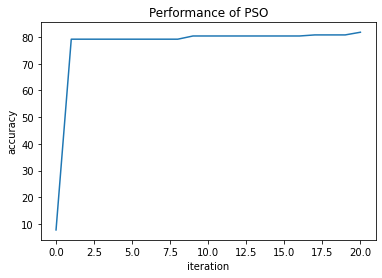

In [ ]:
iter=list(range(0,iteration+1))
plt.plot(iter,acciwis)
 
# naming the x axis
plt.xlabel('iteration')
# naming the y axis
plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('Performance of PSO')

#Genetic Algorithm

In [ ]:
#List of Parameters to optimize
hyperparameters = [[5,6,7,8,9,10],
                 [16,32,64,128,256,512,1024],
                 ["tanh","softmax","sigmoid","selu","softplus","softsign","hard_sigmoid","linear"], #"leakyrelu",
                 ["sgd","rmsprop","adagrad","adadelta","adam","adamax","nadam"],
                 ["mean_squared_error","mean_absolute_error","mean_absolute_percentage_error","mean_squared_logarithmic_error","squared_hinge","hinge","categorical_hinge","logcosh","categorical_crossentropy","binary_crossentropy","kullback_leibler_divergence","poisson"] #"sparse_categorical_crossentropy",
                ]

In [ ]:
#Setting up Neural Network for Genetic Algorithm to optimize
class Network:
  #defining Initial network
    def __init__(self,input_shape,classes,hyperparameters,epochs):
        
        self.architecture_DNA = [] # to save current parameters
        self.fitness = []
        self.acc_history1 =[]
        self.acc_history = []
        self.hpara=[]
        self.input_shape = input_shape 
        self.classes = classes
        self.epochs = epochs
        
        
        # unfold  hyperparameters:
        depth = hyperparameters[0]
        neurons_per_layer = hyperparameters[1]
        activations = hyperparameters[2]
        optimizer = hyperparameters[3]
        losses = hyperparameters[4]
        
        model = Sequential()
        # Building the init network with random choices: 
        network_depth = np.random.choice(depth)
        self.architecture_DNA.append(network_depth)

        for i in range(network_depth):
            if i == 0:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons, activation])
                model.add(Dense(neurons,input_shape = (self.input_shape,), activation  = activation))
            if i == network_depth - 1:
                activation  = np.random.choice(activations)
                self.architecture_DNA.append(activation)
                model.add(Dense(self.classes, activation = activation ))
            else:
                neurons = np.random.choice(neurons_per_layer)
                activation  = np.random.choice(activations)
                self.architecture_DNA.append([neurons,activation])
                model.add(Dense(neurons, activation  = activation))
        
        loss=np.random.choice(losses)
        optimizer=np.random.choice(optimizer)
        self.architecture_DNA.append([loss,optimizer])
        model.compile(loss=loss, optimizer= optimizer, metrics=['accuracy'])
        self.model = model
    
    #creating children
    def create_children(self, children_DNA):
        model = Sequential()
        children_depth = children_DNA[0]
        for i in range(children_depth):
            if i == 0:
                #Input Layer
                model.add(Dense(children_DNA[1][0],input_shape = (self.input_shape,), activation = children_DNA[1][1]))
            if i == children_depth -1:
                model.add(Dense(self.classes, activation = children_DNA[children_depth]))
            else:
                if i != children_depth -1:
                    model.add(Dense(children_DNA[i+1][0], activation = children_DNA[i+1][1]))
        model.compile(loss = children_DNA[-1][0], optimizer = children_DNA[-1][1], metrics=['accuracy'])
        self.architecture_DNA = children_DNA
        
        
    #function to return fitness
    def give_fitness(self):
        return self.fitness
    
    #function to train model
    def train(self):
        self.model.fit(trainX[0:500], trainY[0:500], epochs=5, batch_size=32, validation_data=(testX, testY), verbose=0) 
        self.hpara.append(self.architecture_DNA)
        loss, acc = self.model.evaluate(testX,testY)
        self.acc_history1.append(acc)
 
    #function to evaluate model
    def test(self):
        loss, acc = self.model.evaluate(testX,testY)
        self.fitness = acc
        self.acc_history.append(acc)
    
    #function to pass better parameters to children
    def give_DNA(self):
        return self.architecture_DNA
    
    #function to return summary
    def architecture(self):
        self.model.summary()

In [ ]:
#Intializing Parameters
image_vector_size = 28*28

population_size = 4
mutation_rate = 0.03
generations = 3
training_epochs = 1
population = None
children_population_DNA = []
acc = []
norm_acc = []

In [ ]:
population = [Network(image_vector_size, 10, hyperparameters,training_epochs) for i in range(population_size)]

In [ ]:
#Function to mutate DNA to explore parameters
def mutate():
  for child_DNA in children_population_DNA:
      for i in range(len(child_DNA)):
          if np.random.random() < mutation_rate:
              print("\nMutation!")
              if i == 0:
                  new_depth = np.random.choice(hyperparameters[0])
                  child_DNA[0] = new_depth
              
              if i == len(child_DNA)-2:
                  new_output_activation = np.random.choice(hyperparameters[2])
                  child_DNA[-2] = new_output_activation
              
              if i == len(child_DNA)-1:
                  if np.random.random() < 0.5:
                      new_loss = np.random.choice(hyperparameters[4])
                      child_DNA[-1][0] = new_loss
                  else:
                      new_optimizer = np.random.choice(hyperparameters[3])
                      child_DNA[-1][1] = new_optimizer
              if i != 0 and i !=len(child_DNA)-2 and i != len(child_DNA)-1:
                  if np.random.random() < 0.33:
                      new_activation = np.random.choice(hyperparameters[2])
                      child_DNA[i][1] = new_activation
                  else:
                      new_neuron_count = np.random.choice(hyperparameters[1])
                      child_DNA[i][0] = new_neuron_count

In [ ]:
#Function to create children from DNA
def reproduction(norm_acc):
  population_idx = [i for i in range(len(population))]
  for i in range(len(population)):
  #selects two parents probabilistic accroding to the fitness score
      if sum(norm_acc) != 0:
          parent1 = np.random.choice(population_idx, p = norm_acc)
          parent2 = np.random.choice(population_idx, p = norm_acc)
      else:
        # if there are no "best" parents choose randomly 
          parent1 = np.random.choice(population_idx)
          parent2 = np.random.choice(population_idx)

      # picking random midpoint for crossing over name/DNA
      parent1_DNA = population[parent1].give_DNA()
      parent2_DNA = population[parent2].give_DNA()

      mid_point_1 = np.random.choice([i for i in range(2,len(parent1_DNA)-2)])
      mid_point_2 = np.random.choice([i for i in range(2,len(parent2_DNA)-2)])
      # adding DNA-Sequences of the parents to final DNA
      child_DNA = parent1_DNA[:mid_point_1] + parent2_DNA[mid_point_2:]
      new_nn_depth = len(child_DNA)-2 
      child_DNA[0] = new_nn_depth
      children_population_DNA.append(child_DNA)
  # old population gets the new and proper weights
  mutate()
  keras.backend.clear_session() ## delete old models to free memory
  for i in range(len(population)):
      population[i].create_children(children_population_DNA[i])

In [ ]:
#function to Run the genetic algorithm
def run_evolution():
  for episode in range(generations):
      print("\n--- Generation {} ---".format(episode))
      norm_acc  = []
      acc = []

      #Creating Population
      # global population 

      #training Population members
      for member in population:
          member.train()

      for member in population:
          member.test()
          acc.append(member.give_fitness())

      if episode != generations -1:
          sum_ = sum(acc)
          norm_acc = [i/sum_ for i in acc] 
          reproduction(norm_acc)
      else:
          pass
      children_population_DNA = []

In [ ]:
#Reshaping Data

trainX, trainY
trainX = trainX.reshape(trainX.shape[0], image_vector_size)
testX = testX.reshape(testX.shape[0], image_vector_size)

In [ ]:
run_evolution()


--- Generation 0 ---
313/313 [==============================] - 3s 10ms/step - loss: 2.3317 - accuracy: 0.1000

--- Generation 1 ---
313/313 [==============================] - 2s 8ms/step - loss: 1.7668 - accuracy: 0.2127

Mutation!

--- Generation 2 ---
313/313 [==============================] - 2s 8ms/step - loss: 1.5382 - accuracy: 0.3103


Text(0.5, 1.0, 'Performance of Genetic Algorithm')

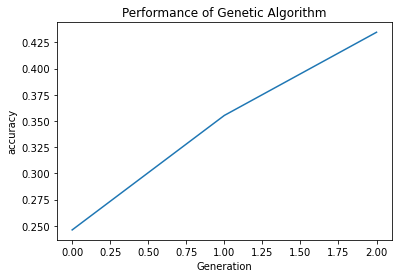

In [ ]:
# plotting history:
opt = []
col1 = []
col2 = []
col3 = []
for a in range(generations):
    for member in population:
      col1.append(member.acc_history[0])
      col2.append(member.acc_history[1])
      col3.append(member.acc_history[2])
opt.append(max(col1))
opt.append(max(col2))
opt.append(max(col3))
plt.plot(opt)
# naming the x axis
plt.xlabel('Generation')
# naming the y axis
plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('Performance of Genetic Algorithm')